# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama :** Abdillah Halim Hanafi
- **Email :** abdillahhalim0@gmail.com
- **ID Dicoding :** abdillahhalimhanafi


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Siapa pelanggan yang memiliki waktu transaksi paling baru, frequency pembelian paling tinggi dan total transaksi paling banyak dalam 2 tahun trakhir ?
- Pertanyaan 2 : Bagaimana mengelompokkan pelanggan menjadi 5 segmen berdasarkan total RFM score mereka dalam 2 tahun terakhir?
- Pertanyaan 3 : Area mana yang memiliki transaksi paling tinggi dalam dua tahun terakhir  ?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# faker dapat digunakan untuk mengenerate data palsu secara random seperti nama
from faker import Faker
import folium
from datetime import timedelta
from folium.plugins import FastMarkerCluster
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

Dataset ini memiliki informasi 100k transaksi dari berbagai marketplace di Brazil dari tahun 2016 - 2018 

### Gathering Data

#### Customer Data

In [3]:
# Import customer data
customerData = pd.read_csv("E-Commerce Public Dataset\customers_dataset.csv")

In [4]:
customerData.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

*   customer_id: Ini adalah ID unik yang secara internal digunakan untuk mengidentifikasi setiap pelanggan dalam sistem.
*   customer_unique_id: Ini juga merupakan ID unik untuk pelanggan, namun mungkin memiliki format yang berbeda atau digunakan untuk tujuan yang berbeda
*   customer_zip_code_prefix: Ini adalah kode pos atau ZIP code dari lokasi pelanggan.
*   customer_city: Ini adalah nama kota tempat pelanggan tinggal.
*   customer_state: Ini adalah kode atau singkatan negara bagian tempat pelanggan

#### Location Data

In [5]:
# Import location data
locationData = pd.read_csv("E-Commerce Public Dataset\geolocation_dataset.csv")

In [6]:
locationData.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

* geolocation_zip_code_prefix: Ini adalah bagian awal dari kode pos di suatu lokasi. Biasanya digunakan untuk mengidentifikasi wilayah atau area tertentu dalam sebuah kota.
* geolocation_lat: Ini adalah lintang geografis dari lokasi.
* geolocation_lng: Ini adalah bujur geografis dari lokasi.
* geolocation_city: Ini adalah nama kota di mana lokasi tersebut berada
* geolocation_state: Ini adalah kode atau singkatan negara bagian di mana lokasi tersebut berada.

#### Order Items Data

In [7]:
# import  order items data
orderItemsData = pd.read_csv("E-Commerce Public Dataset\order_items_dataset.csv")

In [8]:
orderItemsData.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

* order_id: Ini adalah ID unik yang mengidentifikasi setiap pesanan secara keseluruhan. Jadi, beberapa baris bisa memiliki order_id yang sama jika dalam satu pesanan tersebut terdapat beberapa item produk yang berbeda.
* order_item_id: Ini adalah ID unik yang mengidentifikasi setiap item produk dalam sebuah pesanan. Jadi, dalam satu pesanan, setiap item produk akan memiliki order_item_id yang berbeda, meskipun memiliki order_id yang sama.
* product_id: Ini adalah ID unik yang mengidentifikasi produk yang dipesan.
* seller_id: Ini adalah ID unik yang mengidentifikasi penjual atau merchant yang menjual produk tersebut.
* shipping_limit_date: Ini adalah tanggal batas pengiriman produk kepada pembeli.
* price: Ini adalah harga satuan produk yang dipesan.
* freight_value: Ini adalah biaya pengiriman untuk produk tersebut.

#### Order Payments Data

In [9]:
# import order payments data
orderPaymentsData = pd.read_csv("E-Commerce Public Dataset\order_payments_dataset.csv")

In [10]:
orderPaymentsData.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

* order_id: Ini adalah ID unik yang mengidentifikasi setiap pesanan yang terkait dengan pembayaran ini. Dengan kata lain, setiap pembayaran pasti merujuk pada satu pesanan tertentu.
* payment_sequential: Ini menunjukkan urutan pembayaran untuk suatu pesanan tertentu. Jika pelanggan melakukan beberapa pembayaran untuk satu pesanan, maka nilai ini akan berbeda untuk setiap pembayaran.
* payment_type: Ini menunjukkan jenis pembayaran yang dilakukan, dalam contoh ini semuanya menggunakan kartu kredit.
* payment_installments: Ini menunjukkan jumlah cicilan yang dipilih oleh pelanggan untuk pembayaran tersebut. Jika nilainya 1, berarti pembayaran dilakukan secara tunai atau satu kali cicil.
* payment_value: Ini adalah nilai total pembayaran yang dilakukan.

#### Order Review Data

In [11]:
# import order review data
orderReviewsData = pd.read_csv("E-Commerce Public Dataset\order_reviews_dataset.csv")

In [12]:
orderReviewsData.head(10)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
5  15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6  07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
7  7c6400515c67679fbee952a7525281ef  c31a859e34e3adac22f376954e19b39d   
8  a3f6f7f6f433de0aefbb97da197c554c  9c214ac970e84273583ab523dfafd09b   
9  8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   
5             1                  NaN   
6             5                  NaN   
7             5                  NaN   
8             5                  NaN   
9             4            recomendo   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
5                                                NaN  2018-04-13 00:00:00   
6                                                NaN  2017-07-16 00:00:00   
7                                                NaN  2018-08-14 00:00:00   
8                                                NaN  2017-05-17 00:00:00   
9  aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53  
5     2018-04-16 00:39:37  
6     2017-07-18 19:30:34  
7     2018-08-14 21:36:06  
8     2017-05-18 12:05:37  
9     2018-05-23 16:45:47

* review_id: Ini adalah ID unik yang mengidentifikasi setiap ulasan secara individu. Setiap ulasan akan memiliki ID yang berbeda, meskipun mungkin terkait dengan produk atau pesanan yang sama.
* order_id: Ini adalah ID unik yang mengidentifikasi pesanan tempat ulasan ini diberikan. Dengan kata lain, setiap ulasan pasti terkait dengan satu pesanan tertentu.
* review_score: Ini adalah nilai numerik yang menunjukkan rating atau skor yang diberikan oleh pelanggan untuk produk atau layanan tersebut.
* review_comment_title: Ini adalah judul atau topik utama dari ulasan yang diberikan oleh pelanggan.
* review_comment_message: Ini adalah isi lengkap dari ulasan yang diberikan oleh pelanggan. Ini adalah bagian di mana pelanggan memberikan detail tentang pengalaman mereka dengan produk atau layanan.
* review_creation_date: Ini adalah tanggal dan waktu ketika ulasan tersebut dibuat atau dikirimkan oleh pelanggan

#### Orders Data

In [13]:
# import orders data
ordersData = pd.read_csv("E-Commerce Public Dataset\orders_dataset.csv")

In [14]:
ordersData.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

* order_id: Ini adalah ID unik yang mengidentifikasi setiap pesanan secara individu. Setiap pesanan akan memiliki ID yang berbeda, meskipun mungkin dari pelanggan yang sama.
* customer_id: Ini adalah ID unik yang mengidentifikasi pelanggan yang melakukan pesanan. Dengan kata lain, beberapa pesanan dapat memiliki customer_id yang sama jika dilakukan oleh pelanggan yang sama.
* order_status: Ini menunjukkan status terkini dari pesanan, seperti sedang diproses, sudah dikirim, atau sudah diterima oleh pelanggan. Dalam contoh ini, semua status adalah "delivered" yang berarti pesanan sudah sampai ke pelanggan.
* order_purchase_timestamp: Ini adalah tanggal dan waktu ketika pesanan pertama kali dibuat atau dilakukan oleh pelanggan.
* order_approved_at: Ini adalah tanggal dan waktu ketika pesanan disetujui atau diverifikasi oleh sistem.
* order_delivered_carrier_date: Ini adalah tanggal dan waktu ketika pesanan diserahkan kepada kurir untuk dikirimkan.
* order_delivered_customer_date: Ini adalah tanggal dan waktu ketika pesanan diterima oleh pelanggan.
* order_estimated_delivery_date: Ini adalah tanggal perkiraan pengiriman yang diberikan kepada pelanggan saat melakukan pesanan.

#### Product Category

In [15]:
# import data product category
productCategoryData = pd.read_csv("E-Commerce Public Dataset\product_category_name_translation.csv")

In [16]:
productCategoryData.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

* product_category_name: Nama kategori produk dalam bahasa Portugis. Ini adalah nama yang digunakan dalam sistem atau database internal perusahaan
* product_category_name_english: Terjemahan nama kategori produk ke dalam bahasa Inggris.

#### Products Data

In [17]:
# import product data
productsData = pd.read_csv("E-Commerce Public Dataset\products_dataset.csv")

In [18]:
productsData.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

* product_id: ID unik yang diberikan kepada setiap produk untuk identifikasi.
* product_category_name: Kategori di mana produk tersebut termasuk.  
* product_name_lenght: Panjang dari nama produk. Ini bisa berguna untuk analisis terkait dengan bagaimana panjang nama produk mempengaruhi pencarian atau tampilan produk.
* product_description_lenght: Panjang dari deskripsi produk. Deskripsi yang lebih panjang mungkin memberikan informasi yang lebih detail tentang produk.
* product_photos_qty: Jumlah foto yang terkait dengan produk. Lebih banyak foto biasanya memberikan informasi visual yang lebih lengkap tentang produk.
* product_weight_g: Berat produk dalam gram. Informasi ini penting untuk pengiriman dan logistik.
* product_length_cm: Panjang produk dalam sentimeter.
* product_height_cm: Tinggi produk dalam sentimeter.
* product_width_cm: Lebar produk dalam sentimeter. Dimensi produk ini penting untuk pengemasan dan pengiriman.

#### Sellers Data

In [19]:
# import data seller
sellersData = pd.read_csv("E-Commerce Public Dataset\sellers_dataset.csv")

In [20]:
sellersData.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

* seller_id: Ini adalah ID unik yang diberikan kepada setiap penjual untuk identifikasi. ID ini berfungsi sebagai pengenal utama untuk setiap penjual dalam sistem.
* seller_zip_code_prefix: Kode pos awal dari lokasi penjual. Kode pos ini biasanya digunakan untuk mengidentifikasi wilayah geografis di mana penjual berlokasi.
* seller_city: Nama kota tempat penjual berlokasi.
* seller_state: Singkatan dari negara bagian atau provinsi tempat penjual berlokasi.

#### **Insight:**
- Untuk menjawab pertanyaan 1 dan 2 dibutuhkan data yang berisi data customer, data transaksi customer dan total pembayaran yang dilakukan oleh customer, yang terdapat pada Customer Data, Order Payments Data, dan Orders Data
- Untuk menjawab pertanyaan 3 dibutuhkan data berupa lokas dari setiap pelanggan yang melakukan transaksi, data tersebut tersedia di dataset LocationData

### Assessing Data

#### Assesing Customer Data

In [21]:
customerData.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [22]:
# melihat ringkasan dari data 
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [23]:
# memeriksa NA values
customerData.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [24]:
# melihat jumlah setiap zip code yang ada pada data
customerData['customer_zip_code_prefix'].value_counts()

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: count, Length: 14994, dtype: int64

In [25]:
# melihat jumlah fekuensi kemunculan kota dalam data
customerData['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [26]:
# melihat frekuensi kemunculan setiap state dalam data
customerData['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

In [27]:
# memeriksa duplikasi dalam data
customerData.duplicated().sum()

0

In [28]:
# melihat jumlah frekuensi kemunculan unique id customer dalam data
customerData['customer_unique_id'].value_counts()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

In [29]:
# melihat frekuensi kemunculan id customer dalam data
customerData['customer_id'].value_counts()

customer_id
06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
                                   ..
31665bd5bc542687ab54c9fd9ed9917b    1
37fb9cce079a4887c96b59bae2011d05    1
1d815f3ad9b2017b6da2c4f1cbb1180b    1
6b05c8f3a25a71005d5eb9b51766c333    1
274fa6071e5e17fe303b9748641082c8    1
Name: count, Length: 99441, dtype: int64

- Data customer tidak memiliki Na values dan tidak perlu dilakukan pemeriksaan outlier dikarenakan variable numerik hanya terdapat pada kolom customer_zip_code_prefix yang dimana kolom tersebut berisi kode pos pelanggan, 
- Kolom customer_unique_id memiliki beberapa nilai yang lebih dari 1, yang berarti nilai tersebut tidak unique dan tidak dapat dijadikan primary key, dan kolom customer id yang akan di jadikan primary key

#### Assesing Order Payments Data

In [30]:
orderPaymentsData.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [31]:
# melihat ringkasan dari data 
orderPaymentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [32]:
# melihat ringkasan deskriptif statistik dari data
orderPaymentsData.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [33]:
# menampilkan dataset dari urutan paling kecil berdasarkan 'payment value'
orderPaymentsData.sort_values(by=['payment_value'], ascending=True).head(10)

order_id  payment_sequential payment_type  \
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
17931   0218c7a4fb8d5b1bd22c82b783b8359c                   1  credit_card   

        payment_installments  payment_value  
57411                      1           0.00  
100766                     1           0.00  
51280                      1           0.00  
36822                      1           0.00  
77885                      1           0.00  
19922                      1           0.00  
94427                      1           0.00  
62674                      1           0.00  
43744                      1           0.00  
17931                      1           0.01

In [34]:
# memeriksa NA value
orderPaymentsData.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [35]:
# memeriksa nilai duplikat pada data
orderPaymentsData.duplicated().sum()

0

- Dataset ini memiliki order_id sebagai primary key, dan memiliki kolom 'payment_value' yang memberikan informasi pembayaran yang dilakukan berdasarkan order id
- Pada kolom 'payment_value' terdapat pesanan yang membayar dengan jumlah 0
- Dataset ini tidak memiliki NA values, dan duplikat

#### Assesing Orders Data

In [36]:
# menampilkan order data
ordersData.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [37]:
# melihat ringkasan dari order data
ordersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [38]:
# memeriksa NA value
ordersData.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [39]:
# memeriksa nilai duplikat pada data
ordersData.duplicated().sum()

0

In [40]:
# melihat frekuensi kemunculan order_status dalam data
ordersData['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

- Dalam kolom status order terdapat beberapa status transaksi yang tidak dihitung. Canceled yang berarti pesanan di batalkan, dan Unavailable yang produk yang dipesan tidak tersedia
- Beberapa kolom memiliki Na value tetapi kolom yang memiliki Na value tidak akan berpengaruh dengan pertanyaan 1 dan 2

#### Assesing Location Data

In [41]:
# menampilkan location data
locationData.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [42]:
# memeriksa frekuensi kemunculan zip code dalam data
locationData['geolocation_zip_code_prefix'].value_counts()

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
71750       1
71742       1
26475       1
26357       1
29826       1
Name: count, Length: 19015, dtype: int64

In [43]:
# melihat ringkasan dari location data
locationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [44]:
# memeriksa NA value 
locationData.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [45]:
# memeriksa frekuensi kemunculan kota dalam location data
locationData['geolocation_city'].value_counts()

geolocation_city
sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: count, Length: 8011, dtype: int64

In [46]:
# melihat nilai-nilai unik yang ada di dalam kolom 'geolocation_city'
locationData['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [47]:
# memeriksa frekuensi kemunculan state pada location data
locationData['geolocation_state'].value_counts()

geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64

In [48]:
# melihat nilai duplikat pada kolom zip code
locationData.duplicated('geolocation_zip_code_prefix').sum()

981148

#### **Insight:**
- Customer data memiliki dua customer_id dan customer_unique_id, customer_unique_id bukan merupakan primary key yang membuat variabel tersebut tidak terlalu dibutuhkan.
-  Order Payments Data memiliki primary_key yang sama seperti Order data, kedua data tersebut dapat di satukan menggunakan metode merge
-  Order Id memiliki variabel order status yang berisi beberapa status yang dibatalkan seperti 'unavailable', dan 'canceled', yang berartu kedua status tersebut tidak menghasilkan revenue.
- Location Data memiliki zip kode yang sama seperti customer data, tetapi pada Location Data zip kode memiliki duplicate yang cukup banyak, kolom tersebut akan terduplicate jika di merge dengan customer data.

### Cleaning Data

#### Cleanig location data

In [49]:
# menampilkan location data
locationData.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [50]:
# menghapus duplicate pada kolom zip code dari location data
locationData = locationData.drop_duplicates('geolocation_zip_code_prefix', keep='first')

In [51]:
# memeriksa frekuensi kemunculan zip code
locationData['geolocation_zip_code_prefix'].value_counts()

geolocation_zip_code_prefix
1037     1
62030    1
62016    1
62020    1
62031    1
        ..
19907    1
19911    1
19908    1
19940    1
99952    1
Name: count, Length: 19015, dtype: int64

setelah menghapus nilai duplikat pada kolom zip code dari location data, selanjutnya mengganti nama kolom tersebut menjadi sama seperti kolom zip code pada customer data, hal ini dikarenakan kedua data tersebut akan di merge berdasarkan zip code nya

In [52]:
# mengubah nama kolom dan menyesuaikan nama kolom Location Data dengan Customer Data
locationData = locationData.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'})

In [53]:
# menampilkan location data
locationData.head()

customer_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                      1037       -23.545621       -46.639292   
1                      1046       -23.546081       -46.644820   
3                      1041       -23.544392       -46.639499   
4                      1035       -23.541578       -46.641607   
5                      1012       -23.547762       -46.635361   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  
5        são paulo                SP

In [54]:
# menampilkan customer data
customerData.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

#### Merge Data

- Setelah membersihkan data location, tahap selanjutnya adalah melakukan merge customer data dan location data.
- Kemudian melakukan merge order payments data dan order data
- Kemudian hasil dari proses merge masing-masing akan dilakukan merge lagi
- Setelah proses merge selesai akan dilakukan proses assesing data dan cleaning pada data yang sudah di merge

In [55]:
# melakukan merge customer data dengan location data dengan zip code
dataCustomer = customerData.merge(locationData, on='customer_zip_code_prefix')
dataCustomer.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  5dca924cc99eea2dc5ba40d11ec5dd0f  2761fee7f378f0a8d7682d8a3fa07ab1   
2  661897d4968f1b59bfff74c7eb2eb4fc  d06a495406b79cb8203ea21cc0942f8c   
3  702b62324327ccba20f1be3465426437  8b3d988f330c1d1c3332ccd440c147b7   
4  bdf997bae7ca819b0415f5174d6b4302  866755e25db620f8d7e81b351a15bb2f   

   customer_zip_code_prefix customer_city customer_state  geolocation_lat  \
0                     14409        franca             SP       -20.509897   
1                     14409        franca             SP       -20.509897   
2                     14409        franca             SP       -20.509897   
3                     14409        franca             SP       -20.509897   
4                     14409        franca             SP       -20.509897   

   geolocation_lng geolocation_city geolocation_state  
0       -47.397866           franca                SP  
1       -47.397866           franca                SP  
2       -47.397866           franca                SP  
3       -47.397866           franca                SP  
4       -47.397866           franca                SP

In [56]:
# melihat ringkasan data customer
dataCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99163 entries, 0 to 99162
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99163 non-null  object 
 1   customer_unique_id        99163 non-null  object 
 2   customer_zip_code_prefix  99163 non-null  int64  
 3   customer_city             99163 non-null  object 
 4   customer_state            99163 non-null  object 
 5   geolocation_lat           99163 non-null  float64
 6   geolocation_lng           99163 non-null  float64
 7   geolocation_city          99163 non-null  object 
 8   geolocation_state         99163 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 6.8+ MB


In [57]:
# memeriksa duplicate pada data yang telah di merge
dataCustomer.duplicated().sum()

0

In [58]:
# menggabungkan data order dan data payment
new_order_df = ordersData.merge(orderPaymentsData, on='order_id')
new_order_df

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
103881  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
103882  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
103883  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
103884  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
103885  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
103881    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
103882    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
103883    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
103884    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
103885    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
103881          2017-03-10 11:18:03           2017-03-17 15:08:01   
103882          2018-02-07 23:22:42           2018-02-28 17:37:56   
103883          2017-08-28 20:52:26           2017-09-21 11:24:17   
103884          2018-01-12 15:35:03           2018-01-25 23:32:54   
103885          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  payment_sequential payment_type  \
0                2017-10-18 00:00:00                   1  credit_card   
1                2017-10-18 00:00:00                   3      voucher   
2                2017-10-18 00:00:00                   2      voucher   
3                2018-08-13 00:00:00                   1       boleto   
4                2018-09-04 00:00:00                   1  credit_card   
...                              ...                 ...          ...   
103881           2017-03-28 00:00:00                   1  credit_card   
103882           2018-03-02 00:00:00                   1  credit_card   
103883           2017-09-27 00:00:00                   1  credit_card   
103884           2018-02-15 00:00:00                   1  credit_card   
103885           2018-04-03 00:00:00                   1   debit_card   

        payment_installments  payment_value  
0                          1          18.12  
1                          1           2.00  
2                          1          18.59  
3                          1         141.46  
4                          3         179.12  
...                      ...            ...  
103881                     3          85.08  
103882                     3         195.00  
103883                     5         271.01  
103884                     4         441.16  
103885                     1          86.86  

[103886

In [59]:
# menggabungkan data order yang telah di merge dengan data customer yang telah di merge
new_data = new_order_df.merge(dataCustomer, on='customer_id')
new_data

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
103594  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
103595  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
103596  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
103597  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
103598  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
103594    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
103595    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
103596    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
103597    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
103598    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
103594          2017-03-10 11:18:03           2017-03-17 15:08:01   
103595          2018-02-07 23:22:42           2018-02-28 17:37:56   
103596          2017-08-28 20:52:26           2017-09-21 11:24:17   
103597          2018-01-12 15:35:03           2018-01-25 23:32:54   
103598          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  payment_sequential payment_type  \
0                2017-10-18 00:00:00                   1  credit_card   
1                2017-10-18 00:00:00                   3      voucher   
2                2017-10-18 00:00:00                   2      voucher   
3                2018-08-13 00:00:00                   1       boleto   
4                2018-09-04 00:00:00                   1  credit_card   
...                              ...                 ...          ...   
103594           2017-03-28 00:00:00                   1  credit_card   
103595           2018-03-02 00:00:00                   1  credit_card   
103596           2017-09-27 00:00:00                   1  credit_card   
103597           2018-02-15 00:00:00                   1  credit_card   
103598           2018-04-03 00:00:00                   1   debit_card   

        payment_installments  payment_value                customer_unique_id  \
0                          1          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                          1           2.00  7c396fd4830fd04220f754e42b4e5bff   
2                          1          18.59  7c396fd4830fd04220f754e42b4e5bff   
3                          1         141.46  af07308b275d755c9edb36a90c618231   
4                          3         179.12  3a653a41f6f9fc3d2a113cf8398680e8   
...                      ...            ...                               

In [60]:
# memeriksa null value
new_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 174
order_delivered_carrier_date     1880
order_delivered_customer_date    3117
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
geolocation_lat                     0
geolocation_lng                     0
geolocation_city                    0
geolocation_state                   0
dtype: int64

#### Cleaning new data

In [61]:
# membuat dataset baru yang akan digunakan untuk EDA dan visulisasi
dataCustomer = new_data[['customer_id','customer_city','order_status','order_purchase_timestamp','payment_value','customer_state','geolocation_lat',	'geolocation_lng']]
dataCustomer

customer_id        customer_city order_status  \
0       9ef432eb6251297304e76186b10a928d            sao paulo    delivered   
1       9ef432eb6251297304e76186b10a928d            sao paulo    delivered   
2       9ef432eb6251297304e76186b10a928d            sao paulo    delivered   
3       b0830fb4747a6c6d20dea0b8c802d7ef            barreiras    delivered   
4       41ce2a54c0b03bf3443c3d931a367089           vianopolis    delivered   
...                                  ...                  ...          ...   
103594  39bd1228ee8140590ac3aca26f2dfe00  sao jose dos campos    delivered   
103595  1fca14ff2861355f6e5f14306ff977a7         praia grande    delivered   
103596  1aa71eb042121263aafbe80c1b562c9c          nova vicosa    delivered   
103597  b331b74b18dc79bcdf6532d51e1637c1              japuiba    delivered   
103598  edb027a75a1449115f6b43211ae02a24                 lapa    delivered   

       order_purchase_timestamp  payment_value customer_state  \
0           2017-10-02 10:56:33          18.12             SP   
1           2017-10-02 10:56:33           2.00             SP   
2           2017-10-02 10:56:33          18.59             SP   
3           2018-07-24 20:41:37         141.46             BA   
4           2018-08-08 08:38:49         179.12             GO   
...                         ...            ...            ...   
103594      2017-03-09 09:54:05          85.08             SP   
103595      2018-02-06 12:58:58         195.00             SP   
103596      2017-08-27 14:46:43         271.01             BA   
103597      2018-01-08 21:28:27         441.16             RJ   
103598      2018-03-08 20:57:30          86.86             PR   

        geolocation_lat  geolocation_lng  
0            -23.574809       -46.587471  
1            -23.574809       -46.587471  
2            -23.574809       -46.587471  
3            -12.169860       -44.988369  
4            -16.746337       -48.514624  
...                 ...              ...  
103594       -23.178732       -45.889711  
103595       -24.001467       -46.446355  
103596       -17.891522       -39.370942  
103597       -22.555985       -42.690761  
103598       -25.775722       -49.723981  

[103599 rows x 8 columns]

In [62]:
# memeriksa frekuensi kemunculan status yang ada pada kolom order status
dataCustomer['order_status'].value_counts()

order_status
delivered      100484
shipped          1159
canceled          662
unavailable       646
invoiced          324
processing        318
created             4
approved            2
Name: count, dtype: int64

In [63]:
# menghapus nilai 'unavailable' dan 'canceled' pada order status
dataCustomer = dataCustomer[~dataCustomer['order_status'].isin(['unavailable', 'canceled'])]
dataCustomer['order_status'].value_counts()

order_status
delivered     100484
shipped         1159
invoiced         324
processing       318
created            4
approved           2
Name: count, dtype: int64

In [64]:
# mengubah tipe data timestamp menjadi datetime yang akan digunakan untuk mencari nilai Recency
dataCustomer['order_purchase_timestamp'] = pd.to_datetime(dataCustomer['order_purchase_timestamp'])
dataCustomer

customer_id        customer_city order_status  \
0       9ef432eb6251297304e76186b10a928d            sao paulo    delivered   
1       9ef432eb6251297304e76186b10a928d            sao paulo    delivered   
2       9ef432eb6251297304e76186b10a928d            sao paulo    delivered   
3       b0830fb4747a6c6d20dea0b8c802d7ef            barreiras    delivered   
4       41ce2a54c0b03bf3443c3d931a367089           vianopolis    delivered   
...                                  ...                  ...          ...   
103594  39bd1228ee8140590ac3aca26f2dfe00  sao jose dos campos    delivered   
103595  1fca14ff2861355f6e5f14306ff977a7         praia grande    delivered   
103596  1aa71eb042121263aafbe80c1b562c9c          nova vicosa    delivered   
103597  b331b74b18dc79bcdf6532d51e1637c1              japuiba    delivered   
103598  edb027a75a1449115f6b43211ae02a24                 lapa    delivered   

       order_purchase_timestamp  payment_value customer_state  \
0           2017-10-02 10:56:33          18.12             SP   
1           2017-10-02 10:56:33           2.00             SP   
2           2017-10-02 10:56:33          18.59             SP   
3           2018-07-24 20:41:37         141.46             BA   
4           2018-08-08 08:38:49         179.12             GO   
...                         ...            ...            ...   
103594      2017-03-09 09:54:05          85.08             SP   
103595      2018-02-06 12:58:58         195.00             SP   
103596      2017-08-27 14:46:43         271.01             BA   
103597      2018-01-08 21:28:27         441.16             RJ   
103598      2018-03-08 20:57:30          86.86             PR   

        geolocation_lat  geolocation_lng  
0            -23.574809       -46.587471  
1            -23.574809       -46.587471  
2            -23.574809       -46.587471  
3            -12.169860       -44.988369  
4            -16.746337       -48.514624  
...                 ...              ...  
103594       -23.178732       -45.889711  
103595       -24.001467       -46.446355  
103596       -17.891522       -39.370942  
103597       -22.555985       -42.690761  
103598       -25.775722       -49.723981  

[102291 rows x 8 columns]

In [65]:
# melihat ringkasan deskriptif statistik pada data
dataCustomer.describe()

order_purchase_timestamp  payment_value  geolocation_lat  \
count                         102291  102291.000000    102291.000000   
mean   2017-12-30 14:27:10.882931968     153.439256       -21.176080   
min              2016-09-04 21:15:19       0.000000       -36.605374   
25%       2017-09-11 10:15:00.500000      56.790000       -23.587054   
50%              2018-01-18 08:02:14     100.000000       -22.925059   
75%       2018-05-03 23:25:21.500000     171.555000       -20.125078   
max              2018-09-03 09:06:57   13664.080000        42.184003   
std                              NaN     214.824025         5.627891   

       geolocation_lng  
count    102291.000000  
mean        -46.159772  
min         -72.666706  
25%         -48.089559  
50%         -46.628441  
75%         -43.571600  
max          -8.577855  
std           4.077710

In [66]:
# menghapus data yang memiliki payment_value = 0, dikarenakan pembayaran tersebut tidak menambah pendapatan
dataCustomer.sort_values(by=['payment_value'], ascending=True).head(10)

customer_id   customer_city order_status  \
100999  f2def7f64f36952f2f5a9791f0285f34  rio de janeiro    delivered   
27026   9af2372a1e49340278e7c1ef8d749f34          cuiaba      shipped   
89353   648121b599d98c420ef93f6135f8c80c        anchieta    delivered   
27035   9af2372a1e49340278e7c1ef8d749f34          cuiaba      shipped   
447     8eab8f9b3c744b76b65f7a2c0c8f2d6c         goiania    delivered   
33701   843b211abe7b0264dd4a69eafc5bdf43      petropolis    delivered   
30647   0d14d28bc941474750feb2e030e54460       sao paulo    delivered   
74636   430ec51e3c42def76f0d79a8edb21784       sao paulo    delivered   
58481   205df4889b5510ff3f9d8a4ec4a1b421        paracatu    delivered   
99220   dd171c5cd21429f0a17605d2428d2bf0  belo horizonte    delivered   

       order_purchase_timestamp  payment_value customer_state  \
100999      2018-01-24 23:24:14           0.00             RJ   
27026       2017-04-20 12:45:34           0.00             MT   
89353       2017-05-27 19:20:24           0.00             ES   
27035       2017-04-20 12:45:34           0.00             MT   
447         2017-06-08 21:18:45           0.00             GO   
33701       2017-10-26 23:51:35           0.00             RJ   
30647       2017-10-22 00:31:28           0.01             SP   
74636       2017-10-13 12:58:35           0.01             SP   
58481       2017-05-30 11:00:28           0.01             MG   
99220       2017-08-31 00:47:54           0.01             MG   

        geolocation_lat  geolocation_lng  
100999       -22.851621       -43.251328  
27026        -15.615363       -56.076605  
89353        -20.804830       -40.649292  
27035        -15.615363       -56.076605  
447          -16.628877       -49.285241  
33701        -22.515870       -43.170783  
30647        -23.740974       -46.670188  
74636        -23.469043       -46.722123  
58481        -17.211338       -46.886436  
99220        -19.934471       -43.908853

In [67]:
# menghapus nilai payment value yang berisi 0
dataCustomer = dataCustomer[~dataCustomer['payment_value'].isin([0.00])]

# memnampilkan data dengan urutan dari yang paling kecil sebanyak 10 baris 
dataCustomer.sort_values(by=['payment_value'], ascending=True).head(10)

customer_id          customer_city order_status  \
13176  8e54a1f4e992629b3c41f7905d6b46c3              sao paulo    delivered   
30647  0d14d28bc941474750feb2e030e54460              sao paulo    delivered   
74636  430ec51e3c42def76f0d79a8edb21784              sao paulo    delivered   
7628   c33e62b6b6e872a818d2f85f632b5483                 lavras    delivered   
58481  205df4889b5510ff3f9d8a4ec4a1b421               paracatu    delivered   
99220  dd171c5cd21429f0a17605d2428d2bf0         belo horizonte    delivered   
42082  9ea3c1c432aa8be6b9c04d7fea7f66ed  sao bernardo do campo    delivered   
31129  31ad6b689eef45fc804eae97be42ca4b                colombo    delivered   
84374  0d10f3ce86eae5da478b5475eb2f03bd                itapevi    delivered   
89152  30dc4f27dcf5d2ebf9a48f7799229ad3                barueri    delivered   

      order_purchase_timestamp  payment_value customer_state  geolocation_lat  \
13176      2018-07-30 17:46:46           0.01             SP       -23.531855   
30647      2017-10-22 00:31:28           0.01             SP       -23.740974   
74636      2017-10-13 12:58:35           0.01             SP       -23.469043   
7628       2018-04-19 22:05:52           0.01             MG       -21.248980   
58481      2017-05-30 11:00:28           0.01             MG       -17.211338   
99220      2017-08-31 00:47:54           0.01             MG       -19.934471   
42082      2018-05-22 17:58:24           0.03             SP       -23.695543   
31129      2017-11-29 20:03:11           0.03             PR       -25.364113   
84374      2017-08-31 16:38:29           0.05             SP       -23.547864   
89152      2018-06-11 13:51:38           0.05             SP       -23.506827   

       geolocation_lng  
13176       -46.443385  
30647       -46.670188  
74636       -46.722123  
7628        -44.998179  
58481       -46.886436  
99220       -43.908853  
42082       -46.561585  
31129       -49.148504  
84374       -46.925428  
89152       -46.872559

In [68]:
# menampilkan ringkasan data
dataCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102285 entries, 0 to 103598
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               102285 non-null  object        
 1   customer_city             102285 non-null  object        
 2   order_status              102285 non-null  object        
 3   order_purchase_timestamp  102285 non-null  datetime64[ns]
 4   payment_value             102285 non-null  float64       
 5   customer_state            102285 non-null  object        
 6   geolocation_lat           102285 non-null  float64       
 7   geolocation_lng           102285 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 7.0+ MB


In [69]:
# memeriksa duplicate value pada data
dataCustomer.duplicated().sum()

594

In [70]:
# menghapus nilai duplicate
dataCustomer.drop_duplicates(inplace=True)

In [71]:
# memeriksa duplicate value pada data
dataCustomer.duplicated().sum()

0

### **Insight:**
- Dari yang telah di merge dapat dilakukan pencarian nilai RFM untuk proses EDA, data tersebut juga memiliki geolokasi dari setiap pembeli yang akan digunakan untuk menganalisa distrubisi pelanggan berdasarkan daerahnya


## Exploratory Data Analysis (EDA)

### Explore 

- pada proses ini akan dilakukan pencarian nilai RFM (Recency, Frequency dan Monetary)
- kemuadian akan dilakukan pembagian kelompok berdasarkan nilai RFM customer

In [72]:
# menampilkan data customer
dataCustomer.head()

customer_id customer_city order_status  \
0  9ef432eb6251297304e76186b10a928d     sao paulo    delivered   
1  9ef432eb6251297304e76186b10a928d     sao paulo    delivered   
2  9ef432eb6251297304e76186b10a928d     sao paulo    delivered   
3  b0830fb4747a6c6d20dea0b8c802d7ef     barreiras    delivered   
4  41ce2a54c0b03bf3443c3d931a367089    vianopolis    delivered   

  order_purchase_timestamp  payment_value customer_state  geolocation_lat  \
0      2017-10-02 10:56:33          18.12             SP       -23.574809   
1      2017-10-02 10:56:33           2.00             SP       -23.574809   
2      2017-10-02 10:56:33          18.59             SP       -23.574809   
3      2018-07-24 20:41:37         141.46             BA       -12.169860   
4      2018-08-08 08:38:49         179.12             GO       -16.746337   

   geolocation_lng  
0       -46.587471  
1       -46.587471  
2       -46.587471  
3       -44.988369  
4       -48.514624

#### Recency

In [73]:
# mencari nilai recency berdasarkan pembelian terakhir setiap pelanggan
df_recency = dataCustomer.groupby(by='customer_id', as_index=False)['order_purchase_timestamp'].max()

# menentukan kolom yang akan digunakan 
df_recency.columns = ['customer_id', 'LastPurchaseDate']

# menentukan tanggal yang akan digunakan sebagai tolak ukur pengukuran nilai Recency
recent_date = df_recency['LastPurchaseDate'].max() + timedelta(days = 1)

# menambahkan nilai recency yang telah dihitung ke data
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

# menampilkan data
df_recency

customer_id    LastPurchaseDate  Recency
0      00012a2ce6f8dcda20d059ce98491703 2017-11-14 16:08:26      293
1      000161a058600d5901f007fab4c27140 2017-07-16 09:40:32      414
2      0001fd6190edaaf884bcaf3d49edf079 2017-02-28 11:06:43      552
3      0002414f95344307404f0ace7a26f1d5 2017-08-16 13:09:20      383
4      000379cdec625522490c315e70c7a9fb 2018-04-02 13:42:17      154
...                                 ...                 ...      ...
97927  fffcb937e9dd47a13f05ecb8290f4d3e 2018-03-17 00:55:27      171
97928  fffecc9f79fd8c764f843e9951b11341 2018-03-29 16:59:26      158
97929  fffeda5b6d849fbd39689bb92087f431 2018-05-22 13:36:02      104
97930  ffff42319e9b2d713724ae527742af25 2018-06-13 16:57:05       82
97931  ffffa3172527f765de70084a7e53aae8 2017-09-02 11:53:32      366

[97932 rows x 3 columns]

In [74]:
# menampilkan ringkasan deskriptif statistik data recency
df_recency.describe()


LastPurchaseDate       Recency
count                          97932  97932.000000
mean   2018-01-01 01:08:39.518237184    245.688559
min              2016-09-04 21:15:19      1.000000
25%       2017-09-13 09:41:14.500000    122.000000
50%              2018-01-19 16:37:19    227.000000
75%    2018-05-04 21:01:44.750000128    355.000000
max              2018-09-03 09:06:57    729.000000
std                              NaN    153.258217

In [75]:
# memeriksa frekuensi kemunculan nilai pada kolom 'lastpuchasedate' 
df_recency['LastPurchaseDate'].value_counts()

LastPurchaseDate
2018-06-01 13:39:44    3
2018-02-19 15:37:47    3
2018-03-31 15:08:21    3
2017-11-20 10:59:08    3
2018-07-28 13:11:22    3
                      ..
2017-11-16 22:55:45    1
2018-01-27 12:22:18    1
2017-11-27 19:28:04    1
2018-02-01 13:59:49    1
2017-09-02 11:53:32    1
Name: count, Length: 97384, dtype: int64

#### Frequency

In [76]:
# mencari nilai frequency berdasarkan jumlah pembelian pelanggan
frequency_df = dataCustomer.drop_duplicates().groupby(by=['customer_id'], as_index=False)['order_purchase_timestamp'].count()

# menentukan kolom yang akan digunakan
frequency_df.columns = ['customer_id', 'Frequency']

# menampilkan data 
frequency_df

customer_id  Frequency
0      00012a2ce6f8dcda20d059ce98491703          1
1      000161a058600d5901f007fab4c27140          1
2      0001fd6190edaaf884bcaf3d49edf079          1
3      0002414f95344307404f0ace7a26f1d5          1
4      000379cdec625522490c315e70c7a9fb          1
...                                 ...        ...
97927  fffcb937e9dd47a13f05ecb8290f4d3e          1
97928  fffecc9f79fd8c764f843e9951b11341          3
97929  fffeda5b6d849fbd39689bb92087f431          1
97930  ffff42319e9b2d713724ae527742af25          1
97931  ffffa3172527f765de70084a7e53aae8          1

[97932 rows x 2 columns]

In [77]:
# memeriksa frekuensi kemunculan nilai pada kolom 'Frequency'
frequency_df['Frequency'].value_counts()

Frequency
1     95033
2      2490
3       272
4        66
5        15
7        13
6        13
11        7
10        5
12        5
9         4
8         4
17        2
22        1
24        1
19        1
Name: count, dtype: int64

#### Monetary

In [78]:
# menampilkan data customer
dataCustomer.head()

customer_id customer_city order_status  \
0  9ef432eb6251297304e76186b10a928d     sao paulo    delivered   
1  9ef432eb6251297304e76186b10a928d     sao paulo    delivered   
2  9ef432eb6251297304e76186b10a928d     sao paulo    delivered   
3  b0830fb4747a6c6d20dea0b8c802d7ef     barreiras    delivered   
4  41ce2a54c0b03bf3443c3d931a367089    vianopolis    delivered   

  order_purchase_timestamp  payment_value customer_state  geolocation_lat  \
0      2017-10-02 10:56:33          18.12             SP       -23.574809   
1      2017-10-02 10:56:33           2.00             SP       -23.574809   
2      2017-10-02 10:56:33          18.59             SP       -23.574809   
3      2018-07-24 20:41:37         141.46             BA       -12.169860   
4      2018-08-08 08:38:49         179.12             GO       -16.746337   

   geolocation_lng  
0       -46.587471  
1       -46.587471  
2       -46.587471  
3       -44.988369  
4       -48.514624

In [79]:
# memeriksa nilai minimum payment pada data
dataCustomer.min()

customer_id                 00012a2ce6f8dcda20d059ce98491703
customer_city                            abadia dos dourados
order_status                                        approved
order_purchase_timestamp                 2016-09-04 21:15:19
payment_value                                           0.01
customer_state                                            AC
geolocation_lat                                   -36.605374
geolocation_lng                                   -72.666706
dtype: object

In [80]:
# mencari nilai monetary berdasrkan total pembelian pelanggan
monetary_df = dataCustomer.groupby(by='customer_id', as_index=False)['payment_value'].sum()

# menentukan kolom yang akan digunakan
monetary_df.columns = ['customer_id', 'Monetary']

# menampilkan data 
monetary_df.head()

customer_id  Monetary
0  00012a2ce6f8dcda20d059ce98491703    114.74
1  000161a058600d5901f007fab4c27140     67.41
2  0001fd6190edaaf884bcaf3d49edf079    195.42
3  0002414f95344307404f0ace7a26f1d5    179.35
4  000379cdec625522490c315e70c7a9fb    107.01

In [81]:
# memeliksa nilai minimum monetary
monetary_df.min()

customer_id    00012a2ce6f8dcda20d059ce98491703
Monetary                                   6.15
dtype: object

In [82]:
# memeriksa nilai maksimal monetary
monetary_df.max()

customer_id    ffffa3172527f765de70084a7e53aae8
Monetary                               13664.08
dtype: object

#### Merge RFM

- Setelah menghitung nilai rfm, selanjutnya membuat dataset baru dengan menggabungkan nilai rfm
- Kemudian mengelompokkan nilai rfm masing-masing menjadi 5 kelompok menjadi 5 interval 
- Selanjutnya menjumlahkan nilai rfm yang sudah dibuat rentang nilainya dari 1-5
- Setelah menjumlahkan nilai total dari rfm, dari nilai tersebut akan dibagi menjadi 5 tipe customer yaitu : Lost, Low, Medium, High, Top
- kemudian dari setelah semua proses tersebut dilakukan, proses selanjutnya melakukan assesing dan cleaning data,
- setelah proses cleaning data, nilai di dalam kolom customer id akan diganti menjadi nama secara random menggunakan fungsi faker

In [83]:
# menggabungkan setiap nilai RFM sesuai denan customer id
rf_df = df_recency.merge(frequency_df, on='customer_id')

# menggabungkan data dan menghapus kolom 'lastpurchasedate'
rfm_df = rf_df.merge(monetary_df, on='customer_id').drop(
    columns='LastPurchaseDate')

# menampilkan data
rfm_df.head()

customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      293          1    114.74
1  000161a058600d5901f007fab4c27140      414          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      552          1    195.42
3  0002414f95344307404f0ace7a26f1d5      383          1    179.35
4  000379cdec625522490c315e70c7a9fb      154          1    107.01

In [84]:
# memngelompokkan nilai recency menjadi 1-5, 5 menunjukkan pelanggan yang paling baru melakukan transaksi
r = pd.cut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
r

0        3
1        3
2        2
3        3
4        4
        ..
97927    4
97928    4
97929    5
97930    5
97931    3
Name: Recency, Length: 97932, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [85]:
# memeriksa frekuensi kemunculan nilai interval pada Recency
r.value_counts()

Recency
4    33795
5    30395
3    19942
2    12900
1      900
Name: count, dtype: int64

In [86]:
# memngelompokkan nilai recency menjadi 1-5, 5 menunjukkan pelanggan yang paling banyak melakukan transaksi
f = pd.cut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4, 5])
f

0        1
1        1
2        1
3        1
4        1
        ..
97927    1
97928    1
97929    1
97930    1
97931    1
Name: Frequency, Length: 97932, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [87]:
# memngelompokkan nilai recency menjadi 1-5, 5 menunjukkan pelanggan dengan nilai transaksi yang sangat tinggi
m = pd.cut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])
m

0        1
1        1
2        1
3        1
4        1
        ..
97927    1
97928    1
97929    1
97930    1
97931    1
Name: Monetary, Length: 97932, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [88]:
# menambahkan hasil pengelompokkan rfm ke data
rfm_data = rfm_df.assign(R=r.values, F=f.values, M=m.values)

# menampilkan data
rfm_data

customer_id  Recency  Frequency  Monetary  R  F  M
0      00012a2ce6f8dcda20d059ce98491703      293          1    114.74  3  1  1
1      000161a058600d5901f007fab4c27140      414          1     67.41  3  1  1
2      0001fd6190edaaf884bcaf3d49edf079      552          1    195.42  2  1  1
3      0002414f95344307404f0ace7a26f1d5      383          1    179.35  3  1  1
4      000379cdec625522490c315e70c7a9fb      154          1    107.01  4  1  1
...                                 ...      ...        ...       ... .. .. ..
97927  fffcb937e9dd47a13f05ecb8290f4d3e      171          1     91.91  4  1  1
97928  fffecc9f79fd8c764f843e9951b11341      158          3     81.36  4  1  1
97929  fffeda5b6d849fbd39689bb92087f431      104          1     63.13  5  1  1
97930  ffff42319e9b2d713724ae527742af25       82          1    214.13  5  1  1
97931  ffffa3172527f765de70084a7e53aae8      366          1     45.50  3  1  1

[97932 rows x 7 columns]

In [89]:
# memeriksa nilai recency terbaru
rfm_data['Recency'].min()

1

In [90]:
# memastikan recency terbaru sesuai dengan pengelompokkan pada nilai R
rfm_data.sort_values(by=['Recency'], ascending=True)

customer_id  Recency  Frequency  Monetary  R  F  M
28867  4b7decb9b58e2569548b8b4c8e20e8d7        1          1    166.46  5  1  1
6326   10a79ef2783cae3d8d678e85fde235ac        5          1     14.29  5  1  1
33084  56b1ac2855cc6d7950b4ffa6a9b41b0d        5          1    119.42  5  1  1
32161  54365416b7ef5599f54a6c7821d5d290        5          1    106.95  5  1  1
42017  6e353700bc7bcdf6ebc15d6de16d7002        5          1     61.29  5  1  1
...                                 ...      ...        ...       ... .. .. ..
45876  7812fcebfc5e8065d31e1bb5f0017dae      700          1     40.95  1  1  1
84549  dc607dc98d6a11d5d04d9f2a70aa6c34      700          1     92.27  1  1  1
48479  7ec40b22510fdbea1b08921dd39e63d8      700          1     39.09  1  1  1
20427  355077684019f7f60a031656bd7262b8      700          1     45.46  1  1  1
3318   08c5351a6aca1c1589a38f244edeee9d      729          1    136.23  1  1  1

[97932 rows x 7 columns]

In [91]:
# menampilkan data
rfm_data.head()

customer_id  Recency  Frequency  Monetary  R  F  M
0  00012a2ce6f8dcda20d059ce98491703      293          1    114.74  3  1  1
1  000161a058600d5901f007fab4c27140      414          1     67.41  3  1  1
2  0001fd6190edaaf884bcaf3d49edf079      552          1    195.42  2  1  1
3  0002414f95344307404f0ace7a26f1d5      383          1    179.35  3  1  1
4  000379cdec625522490c315e70c7a9fb      154          1    107.01  4  1  1

In [92]:
# menjumlahkan nilai rfm
rfm_data['rfm_total'] = rfm_data[['R', 'F', 'M']].sum(axis=1)

# menampilkan data
rfm_data.head()

customer_id  Recency  Frequency  Monetary  R  F  M  \
0  00012a2ce6f8dcda20d059ce98491703      293          1    114.74  3  1  1   
1  000161a058600d5901f007fab4c27140      414          1     67.41  3  1  1   
2  0001fd6190edaaf884bcaf3d49edf079      552          1    195.42  2  1  1   
3  0002414f95344307404f0ace7a26f1d5      383          1    179.35  3  1  1   
4  000379cdec625522490c315e70c7a9fb      154          1    107.01  4  1  1   

   rfm_total  
0          5  
1          5  
2          4  
3          5  
4          6

In [93]:
# melihat ringkasan data
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97932 entries, 0 to 97931
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   customer_id  97932 non-null  object  
 1   Recency      97932 non-null  int64   
 2   Frequency    97932 non-null  int64   
 3   Monetary     97932 non-null  float64 
 4   R            97932 non-null  category
 5   F            97932 non-null  category
 6   M            97932 non-null  category
 7   rfm_total    97932 non-null  int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 4.0+ MB


In [94]:
# menampilkan data
rfm_data.head()

customer_id  Recency  Frequency  Monetary  R  F  M  \
0  00012a2ce6f8dcda20d059ce98491703      293          1    114.74  3  1  1   
1  000161a058600d5901f007fab4c27140      414          1     67.41  3  1  1   
2  0001fd6190edaaf884bcaf3d49edf079      552          1    195.42  2  1  1   
3  0002414f95344307404f0ace7a26f1d5      383          1    179.35  3  1  1   
4  000379cdec625522490c315e70c7a9fb      154          1    107.01  4  1  1   

   rfm_total  
0          5  
1          5  
2          4  
3          5  
4          6

In [95]:
# mengelompokkan pelanggan menjadi 5 kelompok
cusType = pd.cut(rfm_data['rfm_total'], 5, labels=["Lost", "Low", "Medium", "High", "Top"])

In [96]:
# menambahkan hasil pengelompokkkan customer ke data
rfm_data = rfm_data.assign(customer_type=cusType.values)

# menampilkan data
rfm_data.head()

customer_id  Recency  Frequency  Monetary  R  F  M  \
0  00012a2ce6f8dcda20d059ce98491703      293          1    114.74  3  1  1   
1  000161a058600d5901f007fab4c27140      414          1     67.41  3  1  1   
2  0001fd6190edaaf884bcaf3d49edf079      552          1    195.42  2  1  1   
3  0002414f95344307404f0ace7a26f1d5      383          1    179.35  3  1  1   
4  000379cdec625522490c315e70c7a9fb      154          1    107.01  4  1  1   

   rfm_total customer_type  
0          5           Low  
1          5           Low  
2          4          Lost  
3          5           Low  
4          6        Medium

In [97]:
# memeriksa frekuensi kemunculan setiap nilai pada kolom 'customer_type'
rfm_data['customer_type'].value_counts()

customer_type
Medium    33787
High      30391
Low       19952
Lost      13762
Top          40
Name: count, dtype: int64

In [98]:
# memeriksa nilai duplicate pada data
rfm_data.duplicated().sum()

0

In [99]:
# menggabungkan data hasil perhitungan rfm dengan data yang berisi geolokasi
data_rfm =  rfm_data.merge(dataCustomer, on='customer_id')

In [100]:
# menampilkan 
data_rfm.head()

customer_id  Recency  Frequency  Monetary  R  F  M  \
0  00012a2ce6f8dcda20d059ce98491703      293          1    114.74  3  1  1   
1  000161a058600d5901f007fab4c27140      414          1     67.41  3  1  1   
2  0001fd6190edaaf884bcaf3d49edf079      552          1    195.42  2  1  1   
3  0002414f95344307404f0ace7a26f1d5      383          1    179.35  3  1  1   
4  000379cdec625522490c315e70c7a9fb      154          1    107.01  4  1  1   

   rfm_total customer_type customer_city order_status  \
0          5           Low        osasco    delivered   
1          5           Low   itapecerica    delivered   
2          4          Lost  nova venecia    delivered   
3          5           Low      mendonca    delivered   
4          6        Medium     sao paulo    delivered   

  order_purchase_timestamp  payment_value customer_state  geolocation_lat  \
0      2017-11-14 16:08:26         114.74             SP       -23.499689   
1      2017-07-16 09:40:32          67.41             MG       -20.470582   
2      2017-02-28 11:06:43         195.42             ES       -18.716793   
3      2017-08-16 13:09:20         179.35             MG       -21.770599   
4      2018-04-02 13:42:17         107.01             SP       -23.741140   

   geolocation_lng  
0       -46.766901  
1       -45.108716  
2       -40.397969  
3       -43.355230  
4       -46.690509

In [101]:
# melihat ringkasan dari data
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101691 entries, 0 to 101690
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               101691 non-null  object        
 1   Recency                   101691 non-null  int64         
 2   Frequency                 101691 non-null  int64         
 3   Monetary                  101691 non-null  float64       
 4   R                         101691 non-null  category      
 5   F                         101691 non-null  category      
 6   M                         101691 non-null  category      
 7   rfm_total                 101691 non-null  int64         
 8   customer_type             101691 non-null  category      
 9   customer_city             101691 non-null  object        
 10  order_status              101691 non-null  object        
 11  order_purchase_timestamp  101691 non-null  datetime64[ns]
 12  pa

In [102]:
# menghapus kolom yang tidak diperlukan
data_rfm = data_rfm.drop(columns=['order_purchase_timestamp','payment_value'])

In [103]:
# memeriksa frekuensi kemunculan setiap nilai di dalam kolom 'customer_type'
data_rfm['customer_type'].value_counts()

customer_type
Medium    34969
High      31374
Low       20789
Lost      14362
Top         197
Name: count, dtype: int64

In [104]:
# memeriksa kolom customer id
data_rfm['customer_id'].value_counts()

customer_id
9af2372a1e49340278e7c1ef8d749f34    24
92cd3ec6e2d643d4ebd0e3d6238f69e2    22
b246eeed30b362c09d867b9e598bee51    19
eed931d3a5222a9a511d18be7fd2a5ba    17
13aa59158da63ba0e93ec6ac2c07aacb    17
                                    ..
56dde5ae4a599923a54ea1c9a64c3094     1
56dde41c7bb48ff317cf71625ee3b33c     1
56dc5cd1f1139873dd8df0c85489ef2c     1
56db29d910656521640dd459604f55eb     1
ffffa3172527f765de70084a7e53aae8     1
Name: count, Length: 97932, dtype: int64

In [105]:
# memeriksa nilai duplicate
data_rfm.duplicated('customer_id').sum()

3759

In [106]:
# menghapus nilai duplicate
data_rfm.drop_duplicates('customer_id', inplace=True)
data_rfm.duplicated('customer_id').sum()

0

In [107]:
# melihat frekuensi kemunculan nilai pada customer id
data_rfm['customer_id'].value_counts()

customer_id
00012a2ce6f8dcda20d059ce98491703    1
aa533babb08900a1370fa4888feb4b80    1
aa58e9d75d589687cbb79699e5118e5e    1
aa58d8cc9b866d3ff15d1875adb9edb3    1
aa58d5e8a1d6cd547904e11ef30f1f9d    1
                                   ..
557a197892a569cc513f0f016a7932d9    1
55797a8a69854e4fc1e636937f0c05eb    1
5579271655438f2905a24845dccbcd16    1
55785b9fc90925a1a45bc34d27bcbeef    1
ffffa3172527f765de70084a7e53aae8    1
Name: count, Length: 97932, dtype: int64

In [108]:
# menggunakan fungsi yang dapat membuat data random palsu seperti nama, dan fungsi ini akan menghasilkan data baru setiap di jalankan
fake = Faker()

# Buat kolom baru dengan nama acak
data_rfm['random_name'] = data_rfm.apply(lambda row: fake.name(), axis=1)

# Jika ingin mengganti kolom customer_id dengan nama acak:
data_rfm['customer_id'] = data_rfm['random_name']

In [109]:
# menghapus column random name
data_rfm.drop(columns=['random_name'], inplace=True)

In [110]:
# mengganti nama kolom customer id
data_rfm = data_rfm.rename(columns={'customer_id': 'customer_random_name'})
data_rfm.head()

customer_random_name  Recency  Frequency  Monetary  R  F  M  rfm_total  \
0        Ashley Glover      293          1    114.74  3  1  1          5   
1     Christopher Case      414          1     67.41  3  1  1          5   
2          Drew Jensen      552          1    195.42  2  1  1          4   
3         Jesse Prince      383          1    179.35  3  1  1          5   
4        Andrew Bowman      154          1    107.01  4  1  1          6   

  customer_type customer_city order_status customer_state  geolocation_lat  \
0           Low        osasco    delivered             SP       -23.499689   
1           Low   itapecerica    delivered             MG       -20.470582   
2          Lost  nova venecia    delivered             ES       -18.716793   
3           Low      mendonca    delivered             MG       -21.770599   
4        Medium     sao paulo    delivered             SP       -23.741140   

   geolocation_lng  
0       -46.766901  
1       -45.108716  
2       -40.397969  
3       -43.355230  
4       -46.690509

In [111]:
# eksport data menjadi format csv
# data_rfm.to_csv('RfM_data.csv', index=False)

In [112]:
# mencari top customer
topCustomer = data_rfm['customer_type'] == 'Top'
topCustomer = data_rfm[topCustomer]
topCustomer = topCustomer.sort_values(by=['rfm_total'], ascending=False)
topCustomer

customer_random_name  Recency  Frequency  Monetary  R  F  M  rfm_total  \
8778     Patricia Clark DVM      339          1  13664.08  3  1  5          9   
97303          Angela Rojas       40          1   6922.21  5  1  3          9   
71066          Kim Thompson      269         19     36.82  4  4  1          9   
94131             Tina Wong       50          1   7274.88  5  1  3          9   
80407         Susan Jackson      125         11     60.41  5  3  1          9   
2125    Benjamin Oneill Jr.      283          1   6081.54  4  1  3          8   
81603        Megan Morrison       95          1   4445.50  5  1  2          8   
61630          Whitney Mann      501         24    436.08  2  5  1          8   
66823           Janet Price       88          1   3256.14  5  1  2          8   
67273            Paul Poole      129          1   3005.06  5  1  2          8   
76744       Walter Martinez       19          1   3076.13  5  1  2          8   
93107         Laura Stewart       37          1   4163.51  5  1  2          8   
91547        Karen Cummings      117          1   2759.95  5  1  2          8   
58324         Thomas Burton      453         22     58.16  2  5  1          8   
93795        Mitchell Young       90          2   4034.44  5  1  2          8   
94468           Mark Harper       63          1   2844.96  5  1  2          8   
97568          Kevin Austin       33          6    188.81  5  2  1          8   
98371         Jessica James       94          1   3242.84  5  1  2          8   
99386           Stacey Neal      128          7     68.93  5  2  1          8   
60391         Brandon Cross       95          1   2787.87  5  1  2          8   
51003        Stephen Graham       19          1   3351.35  5  1  2          8   
7786        Jessica Burnett      345         17    187.56  3  4  1          8   
24567         Willie Wilson       73          1   4681.78  5  1  2          8   
10788    Jacqueline Johnson       31          1   4513.32  5  1  2          8   
12363           Kelli Ortiz      172         12     68.59  4  3  1          8   
12751        Jeremy Stewart      137          1   3018.60  5  1  2          8   
15532      Shannon Williams       41          1   3184.34  5  1  2          8   
19911        Steven Johnson      112          1   3979.55  5  1  2          8   
21405        Mark Wilkinson       47          6    224.13  5  2  1          8   
24164      Veronica Elliott       59          1   3406.47  5  1  2          8   
33967        Kathryn Ibarra      127          9    121.68  5  2  1          8   
50291        Jeffrey Keller      130          1   3209.72  5  1  2          8   
34104       Hailey Richmond       97          1   2828.42  5  1  2          8   
38602          Lisa Morales       84          1   3122.72  5  1  2          8   
39521          Misty Martin      201         12    879.44  4  3  1          8   
44068         David Sanchez      116          6   1136.46  5  2  1          8   
44985          Emily Norman      104          1   3195.73  5  1  2          8   
47064   Douglas Stevens Jr.       39          7    309.80  5  2  1          8   
49103        Kenneth Taylor      154         12     96.46  4  3  1          8   
100450         John Johnson      128          1   2818.74  5  1  2          8   

       customer_type          customer_city order_status customer_state  \
8778             Top         rio de janeiro    delivered             RJ   
97303            Top                vitoria    delivered             ES   
71066            Top                   tupa    delivered             SP   
94131            Top             vila velha    delivered             ES   
80407            Top              sao paulo    delivered             SP   
2125             Top            divinopolis    delivered             MG   
81603            Top                niteroi    delivered             RJ   
61630            Top                 cuiaba      shipped             MT   
66823     

In [113]:
# mencari pelanggan yang memiliki value tertinggi
top5Customer = topCustomer.head()
top5Customer

customer_random_name  Recency  Frequency  Monetary  R  F  M  rfm_total  \
8778    Patricia Clark DVM      339          1  13664.08  3  1  5          9   
97303         Angela Rojas       40          1   6922.21  5  1  3          9   
71066         Kim Thompson      269         19     36.82  4  4  1          9   
94131            Tina Wong       50          1   7274.88  5  1  3          9   
80407        Susan Jackson      125         11     60.41  5  3  1          9   

      customer_type   customer_city order_status customer_state  \
8778            Top  rio de janeiro    delivered             RJ   
97303           Top         vitoria    delivered             ES   
71066           Top            tupa    delivered             SP   
94131           Top      vila velha    delivered             ES   
80407           Top       sao paulo    delivered             SP   

       geolocation_lat  geolocation_lng  
8778        -22.901095       -43.182559  
97303       -20.274743       -40.284131  
71066       -21.942739       -50.523017  
94131       -20.376161       -40.305294  
80407       -23.551013       -46.448489

In [114]:
# mencari pelanggan yang memiliki value tertinggi berdasarkan monetary (total nilai transaksi tertinggi)
topMonetary = top5Customer.sort_values(by=['Monetary'], ascending=False)
topMonetary

customer_random_name  Recency  Frequency  Monetary  R  F  M  rfm_total  \
8778    Patricia Clark DVM      339          1  13664.08  3  1  5          9   
94131            Tina Wong       50          1   7274.88  5  1  3          9   
97303         Angela Rojas       40          1   6922.21  5  1  3          9   
80407        Susan Jackson      125         11     60.41  5  3  1          9   
71066         Kim Thompson      269         19     36.82  4  4  1          9   

      customer_type   customer_city order_status customer_state  \
8778            Top  rio de janeiro    delivered             RJ   
94131           Top      vila velha    delivered             ES   
97303           Top         vitoria    delivered             ES   
80407           Top       sao paulo    delivered             SP   
71066           Top            tupa    delivered             SP   

       geolocation_lat  geolocation_lng  
8778        -22.901095       -43.182559  
94131       -20.376161       -40.305294  
97303       -20.274743       -40.284131  
80407       -23.551013       -46.448489  
71066       -21.942739       -50.523017

In [115]:
# mencari pelanggan yang memiliki value tertinggi berdasarkan frequency (total  transaksi terbanyak)
topFrequency = top5Customer.sort_values(by=['Frequency'], ascending=False)
topFrequency

customer_random_name  Recency  Frequency  Monetary  R  F  M  rfm_total  \
71066         Kim Thompson      269         19     36.82  4  4  1          9   
80407        Susan Jackson      125         11     60.41  5  3  1          9   
8778    Patricia Clark DVM      339          1  13664.08  3  1  5          9   
97303         Angela Rojas       40          1   6922.21  5  1  3          9   
94131            Tina Wong       50          1   7274.88  5  1  3          9   

      customer_type   customer_city order_status customer_state  \
71066           Top            tupa    delivered             SP   
80407           Top       sao paulo    delivered             SP   
8778            Top  rio de janeiro    delivered             RJ   
97303           Top         vitoria    delivered             ES   
94131           Top      vila velha    delivered             ES   

       geolocation_lat  geolocation_lng  
71066       -21.942739       -50.523017  
80407       -23.551013       -46.448489  
8778        -22.901095       -43.182559  
97303       -20.274743       -40.284131  
94131       -20.376161       -40.305294

In [116]:
# mencari pelanggan yang memiliki value tertinggi berdasarkan recency (pelanggan yang paling baru melakukan transaksi)
topRecency = top5Customer.sort_values(by=['Recency'], ascending=True)
topRecency

customer_random_name  Recency  Frequency  Monetary  R  F  M  rfm_total  \
97303         Angela Rojas       40          1   6922.21  5  1  3          9   
94131            Tina Wong       50          1   7274.88  5  1  3          9   
80407        Susan Jackson      125         11     60.41  5  3  1          9   
71066         Kim Thompson      269         19     36.82  4  4  1          9   
8778    Patricia Clark DVM      339          1  13664.08  3  1  5          9   

      customer_type   customer_city order_status customer_state  \
97303           Top         vitoria    delivered             ES   
94131           Top      vila velha    delivered             ES   
80407           Top       sao paulo    delivered             SP   
71066           Top            tupa    delivered             SP   
8778            Top  rio de janeiro    delivered             RJ   

       geolocation_lat  geolocation_lng  
97303       -20.274743       -40.284131  
94131       -20.376161       -40.305294  
80407       -23.551013       -46.448489  
71066       -21.942739       -50.523017  
8778        -22.901095       -43.182559

**Insight:**
- Top customer hanya berjumlah 40
- Top monetary customer melakukan sekali pembelian dengan produk yang berharga tinggi, dan sebagian tidak dipengaruhi oleh jumlah produk yang dibeli

## Visualization & Explanatory Analysis

### Pertanyaan 1: Siapa pelanggan yang memiliki waktu transaksi paling baru, frequency pembelian paling tinggi dan total transaksi paling banyak dalam 2 tahun trakhir ?

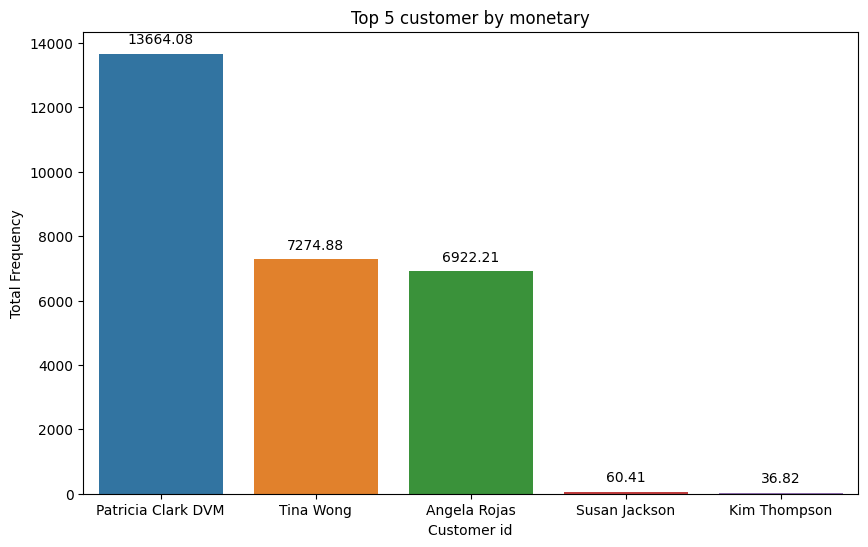

In [117]:
# membuat grafik pelanggan  total transaksi pelanggan pada top monetary
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_random_name', y='Monetary', data=topMonetary)
plt.title('Top 5 customer by monetary')
plt.xlabel('Customer id')
plt.ylabel('Total Frequency')

# menambahkan anotasi untuk setiap bar, agar dapat menampilkan seberapa banyak nilai di setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampilkan grafik
plt.show()

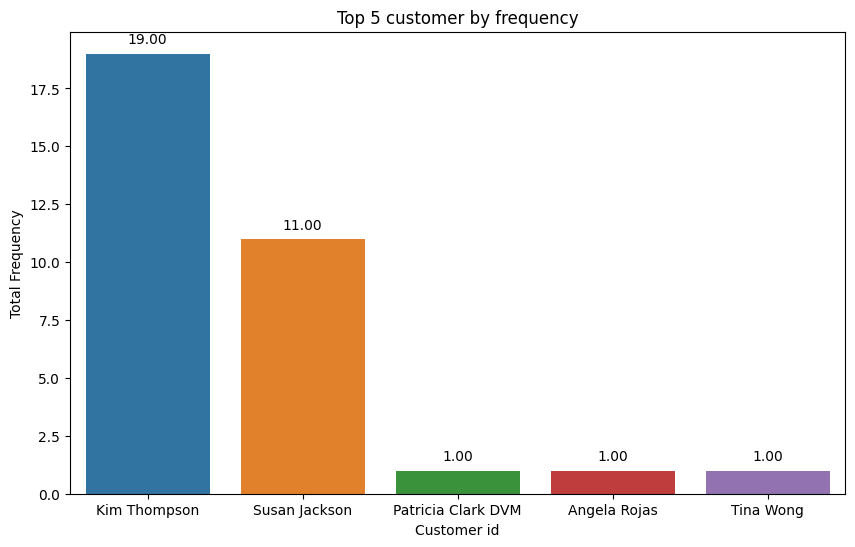

In [118]:
# membuat grafik pelanggan total transaksi pelanggan pada top frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_random_name', y='Frequency', data=topFrequency)
plt.title('Top 5 customer by frequency')
plt.xlabel('Customer id')
plt.ylabel('Total Frequency')

# menambahkan anotasi untuk setiap bar, agar dapat menampilkan seberapa banyak nilai di setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampikan grafik
plt.show()

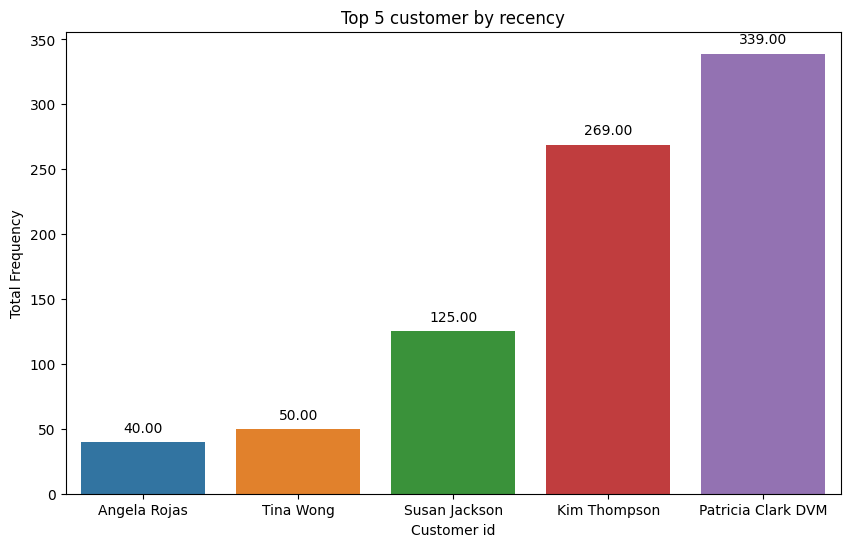

In [119]:
# membuat grafik pelanggan yang paling baru melakukan transaksi pada top customer
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_random_name', y='Recency', data=topRecency)
plt.title('Top 5 customer by recency')
plt.xlabel('Customer id')
plt.ylabel('Total Frequency')

# menambahkan anotasi untuk setiap bar, agar dapat menampilkan seberapa banyak nilai di setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# menampilkan grafik
plt.show()

### Pertanyaan 2: Bagaimana mengelompokkan pelanggan menjadi 5 segmen berdasarkan total RFM score mereka dalam 2 tahun terakhir?

In [ ]:
# membuat dataset untuk menampilkan frekuensi kemunculan nilai dari kolom customer_type
typeCustomer = data_rfm['customer_type'].value_counts()
typeCustomer = pd.DataFrame(typeCustomer)
typeCustomer


count
customer_type       
Medium         33787
High           30391
Low            19952
Lost           13762
Top               40

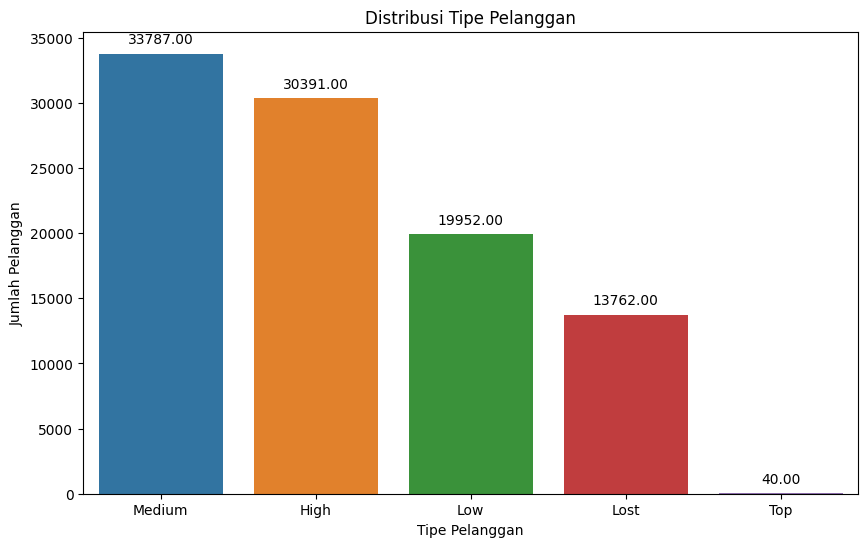

In [121]:
# menampilkan distribusi tipe pelanggan
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', data=data_rfm, order=data_rfm['customer_type'].value_counts().index)
plt.title('Distribusi Tipe Pelanggan')
plt.xlabel('Tipe Pelanggan')
plt.ylabel('Jumlah Pelanggan')

# menambahkan anotasi untuk setiap bar, agar dapat menampilkan seberapa banyak nilai di setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Pertanyaan 3: Area mana yang melakukan transaksi banyak  dalam dua tahun terakhir  ?

In [122]:
print(data_rfm.columns)

Index(['customer_random_name', 'Recency', 'Frequency', 'Monetary', 'R', 'F',
       'M', 'rfm_total', 'customer_type', 'customer_city', 'order_status',
       'customer_state', 'geolocation_lat', 'geolocation_lng'],
      dtype='object')


In [123]:
# menampilkan aktivitas pada area dengan aktivitas paling tinggi
map = folium.Map(location=[-8.783195, -55.491478], zoom_start=3)

FastMarkerCluster(data=list(zip(data_rfm['geolocation_lat'], data_rfm['geolocation_lng']))).add_to(map)

map

**Insight:**
- Setelah mendapatkan pelanggan yang memiliki value paling tinggi, kita dapat menentukan strategi pemasaran dan memberikan promosi atau voucher pada pelanggan yang memilki value tertinggi
- Setelah melihat sebaran area yang memiliki aktivitas transaksi paling tinggi dari pelanggan, kita dapat memberikan promosi berupa gratis pengiriman ke daerah yang paling aktif

## Analisis Lanjutan 

### Melihat korelasi pada data top customer

In [ ]:
# membuat data untuk dilakukan korelasi menggunakan beberapa kolom pada data top customer
correlation_df = topCustomer[['R','F','M','rfm_total']].corr()

# menampilkan korelasi
correlation_df

R         F         M  rfm_total
R          1.000000 -0.781585  0.080377  -0.106773
F         -0.781585  1.000000 -0.626452   0.099069
M          0.080377 -0.626452  1.000000   0.387147
rfm_total -0.106773  0.099069  0.387147   1.000000

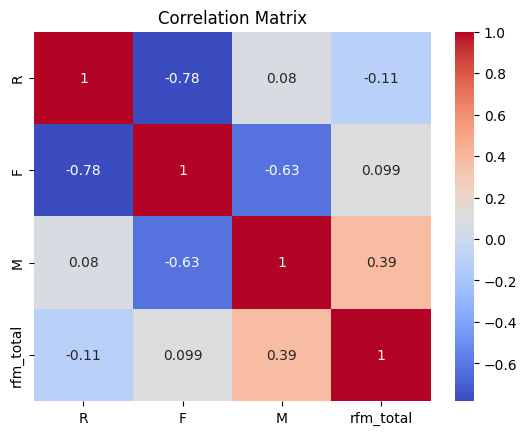

In [ ]:
# membuat visualisasi untuk melihat korelasi terhadap total score rfm
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

R dan rfm_total memiliki korelasi yang  kuat. Ini mengindikasikan bahwa Recency memiliki pengaruh yang sangat besar terhadap nilai total RFM

## Conclusion

- Conclusion pertanyaan 1 : Berdasarkan analisis yang dilakukan, kebanyakan customer yang memiliki score RFM tertinggi dikarenakan membeli produk yang memiliki harga yang tinggi dan pembelian tersebut baru dilakukan dibandingkan dengan pelanggan yang lain yang ada pada kategori Top customer, untuk mempertahankan pelanggan ini hal seperti penawaran program loyalitas yang eksklusif dan personalisasi rekomendasi produk dapat dilakukan.

- Conclusion pertanyaan 2 : Berdasarkan analisis RFM, setelah membagi pelanggan menjadi beberapa segmen, sebagian besar pelanggan berada pada kategori medium, pelanggan pada kategori high lebih banyak dari pada kategori low dan lost, hal ini berarti pelanggan yang loyal dan bernilai tinggi cukup banyak, tetapi pelanggan pada kategori low dan lost perlu dipertahankan. Kemudian pelanggan pada kategori top cukup sedikit, berdasarkan analisa lanjutan hal ini disebabkan korelasi yang kuat antara Recency dan total score, yang berarti kebanyakan pelanggan pada kategori top baru saja melakukan transaksi.

- Conclusion pertanyaan 3 : Berdasarkan visualisai yang dilakukan, area Brazil merupakan area yang paling aktif melakukan transaksi, sesuai dengan data ini berasal yaitu dari beberapa marketplace di Brazil, tetapi ada beberapa daerah diluar Brazil yang melakukan pembelian seperti Argentina dan Portugal, hal ini dapat menjadi pertimbangkan untuk memperluas bisnis ke negara-negara tetangga seperti Argentina dan Portugal, mengingat potensi pertumbuhan pasar yang ada.